In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("Datasets/concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
x = df.drop("Strength",axis = 1)

In [6]:
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
y = df.iloc[:,-1]
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [9]:
x_train.shape

(824, 8)

In [10]:
x_test.shape

(206, 8)

# Without using any Transformation

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.6369606518338298

In [12]:
# Cross checking 
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring = 'r2'))

np.float64(0.4609940491662864)

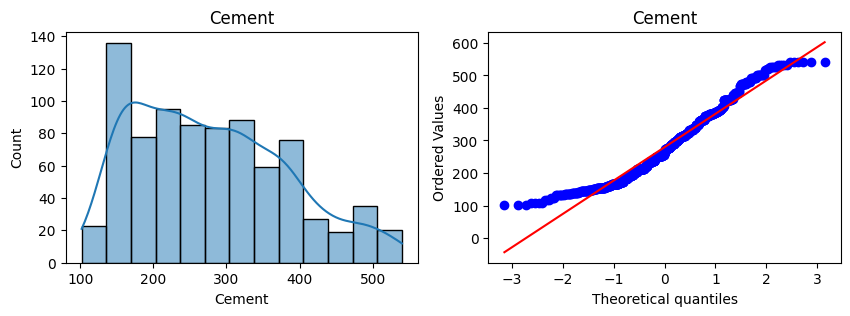

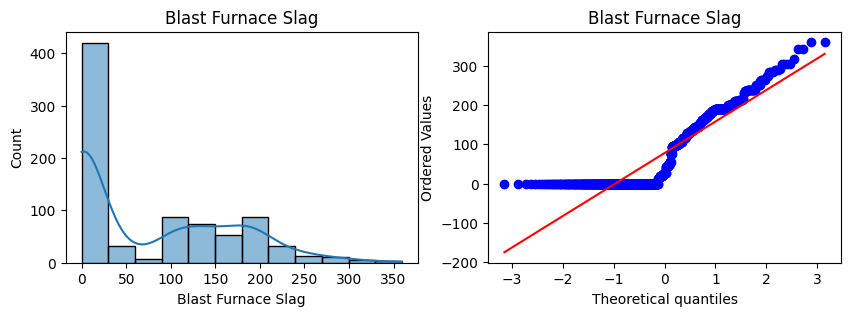

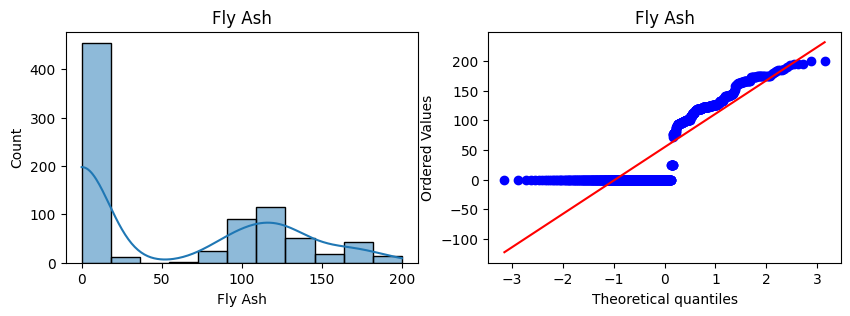

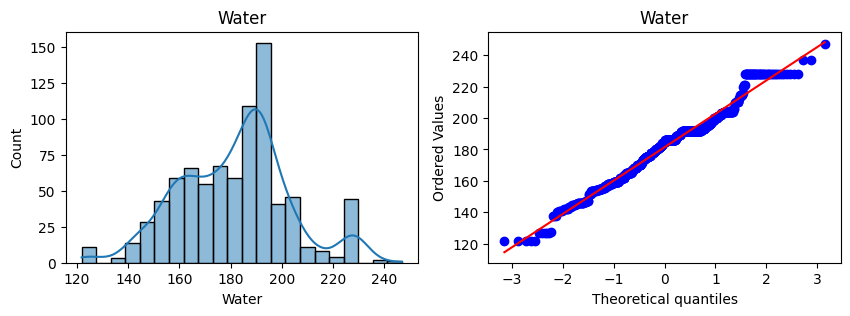

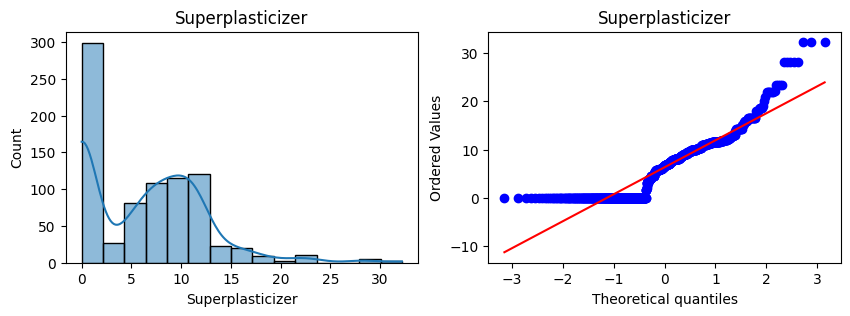

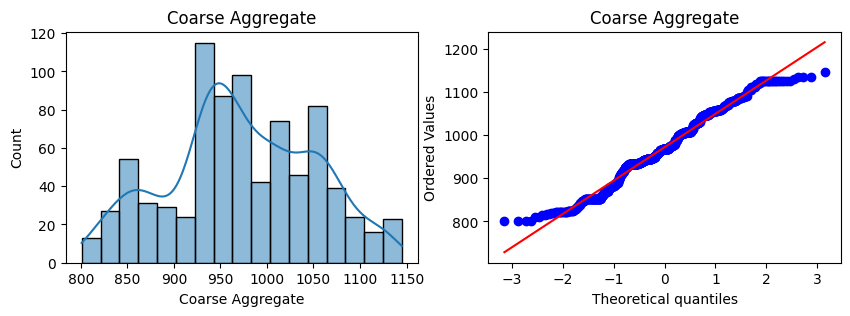

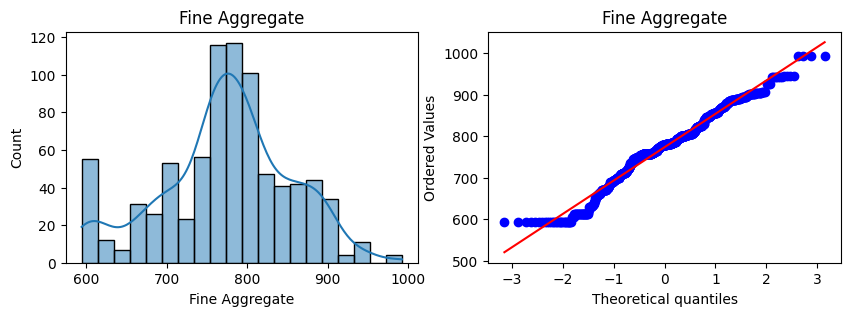

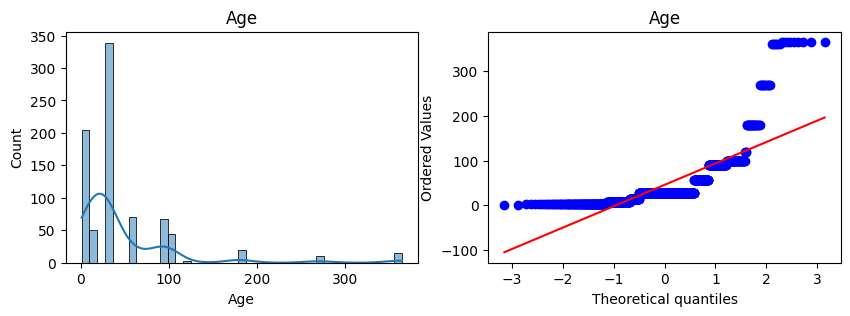

In [13]:
for col in x_train.columns:
    plt.figure(figsize = (10,3))
    plt.subplot(1,2,1)
    sns.histplot(x_train[col],kde = True)
    plt.title(col)

    plt.subplot(1,2,2)
    stats.probplot(x_train[col],dist = "norm",plot = plt)
    plt.title(col)

    plt.show()

# Box-Cox Transformation

In [14]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = "box-cox")
x_train_trans = pt.fit_transform(x_train+0.000000001) # we add small values because there is Zeros in some columns and box-cox doesn't work with Zeros
x_test_trans = pt.transform(x_test+0.000000001)
x_train_trans

array([[ 1.65047695, -1.10850429, -0.90046767, ..., -0.4640251 ,
        -0.67413369,  0.08917529],
       [ 0.9550049 , -1.10850429, -0.90046767, ...,  0.85107025,
        -0.22937878,  0.08917529],
       [ 0.38046144,  0.91983155, -0.90046767, ..., -0.98170819,
        -0.65644538,  0.08917529],
       ...,
       [-1.50616326, -1.10850429,  1.13358648, ..., -0.37428287,
         0.87161449,  0.08917529],
       [-0.24182104,  1.02046154, -0.90046767, ..., -0.3922375 ,
        -1.32134465,  0.08917529],
       [-0.80391627,  0.99663769, -0.90046767, ..., -0.54344628,
        -0.73171314,  1.12486357]])

In [15]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.153049
1,Blast Furnace Slag,0.023681
2,Fly Ash,-0.024811
3,Water,0.888072
4,Superplasticizer,0.077525
5,Coarse Aggregate,1.115681
6,Fine Aggregate,1.789591
7,Age,0.063010


In [16]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)
y_pred2 = lr.predict(x_test_trans)
r2_score(y_test,y_pred2)

0.8121721671345749

In [17]:
pt = PowerTransformer(method = "box-cox")
x_trans = pt.fit_transform(x+0.000000001)
lr = LinearRegression()
np.mean(cross_val_score(lr,x_trans,y,scoring = 'r2'))

np.float64(0.665189439022461)

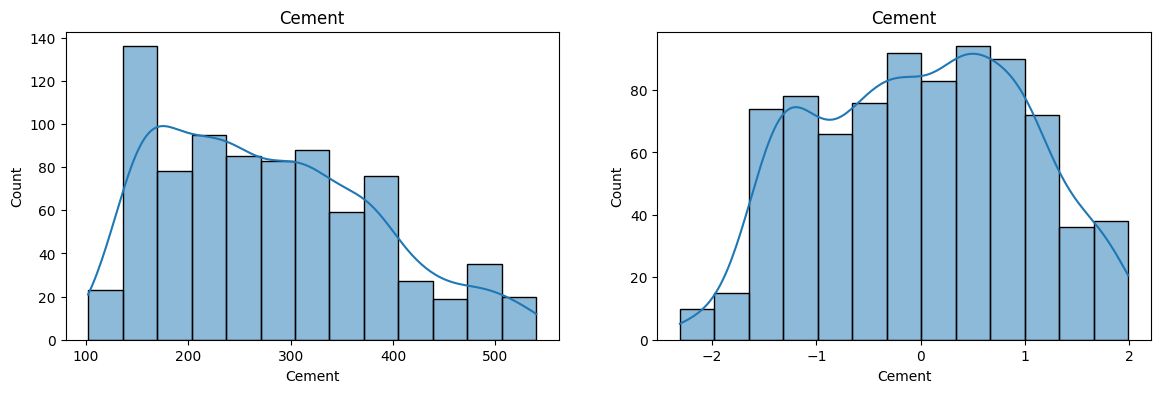

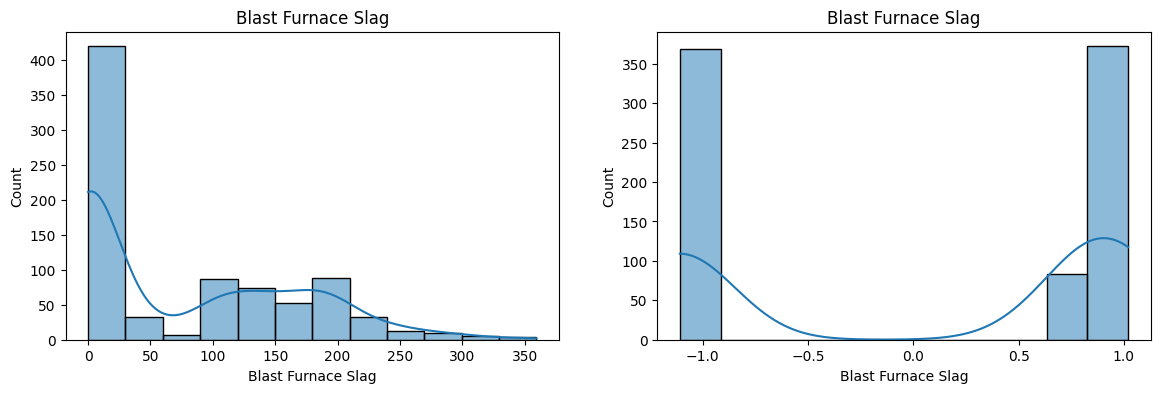

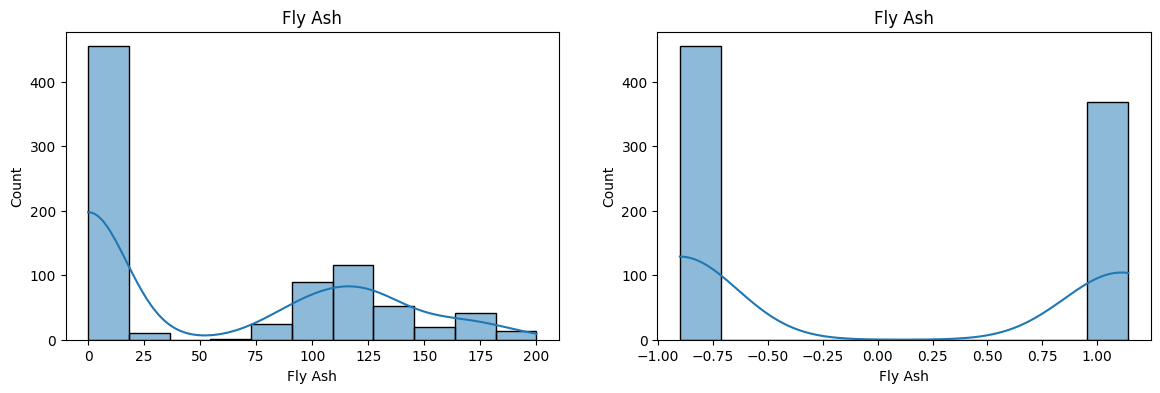

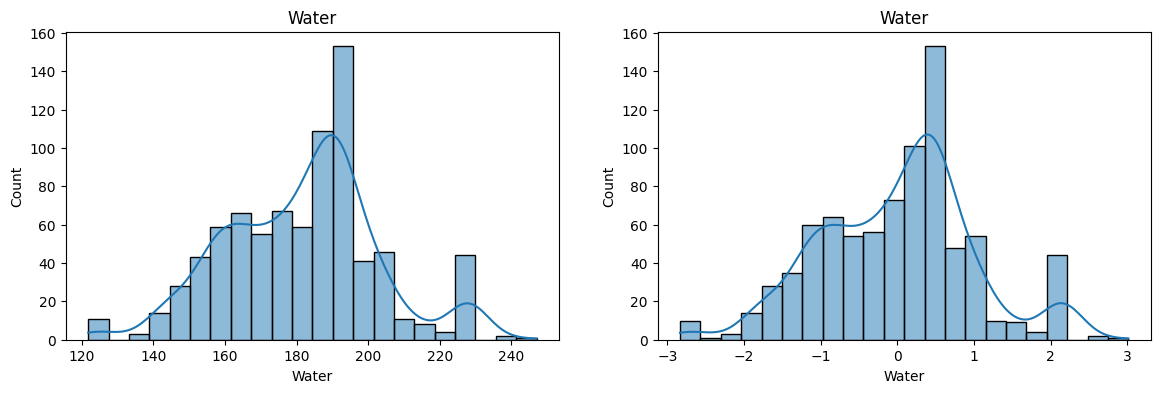

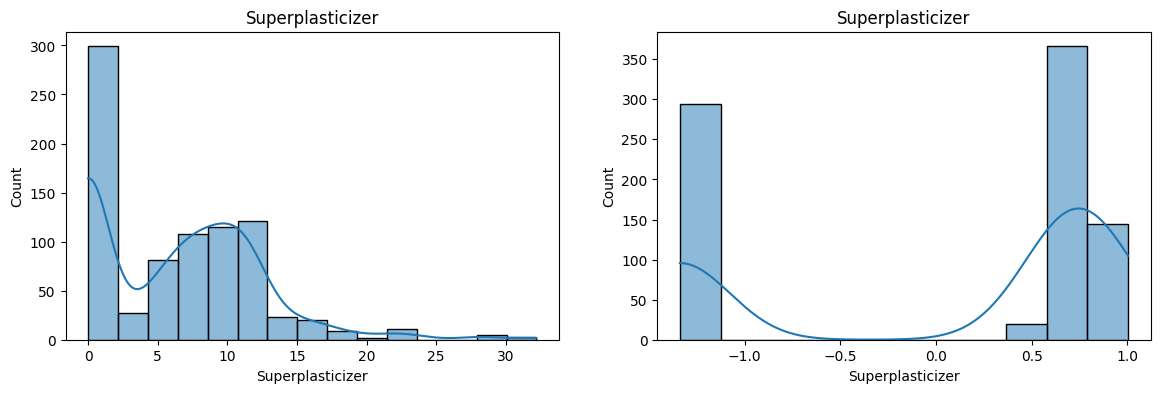

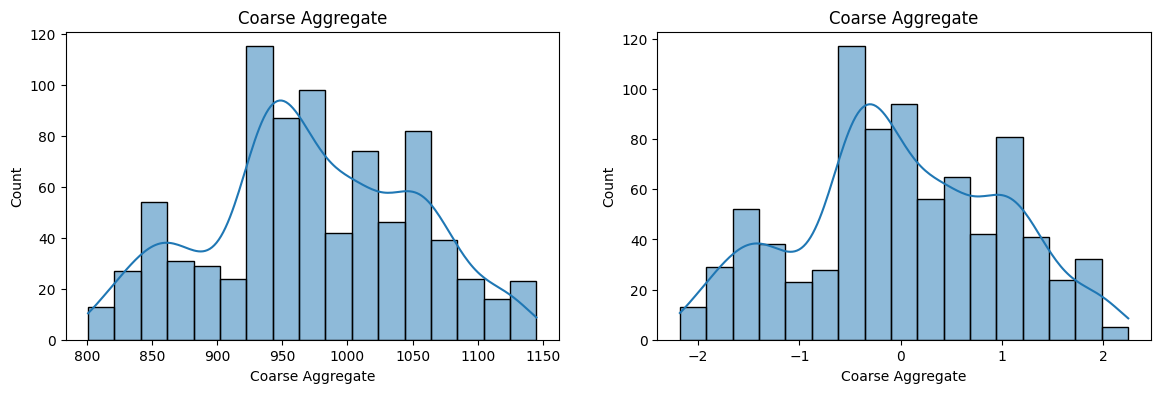

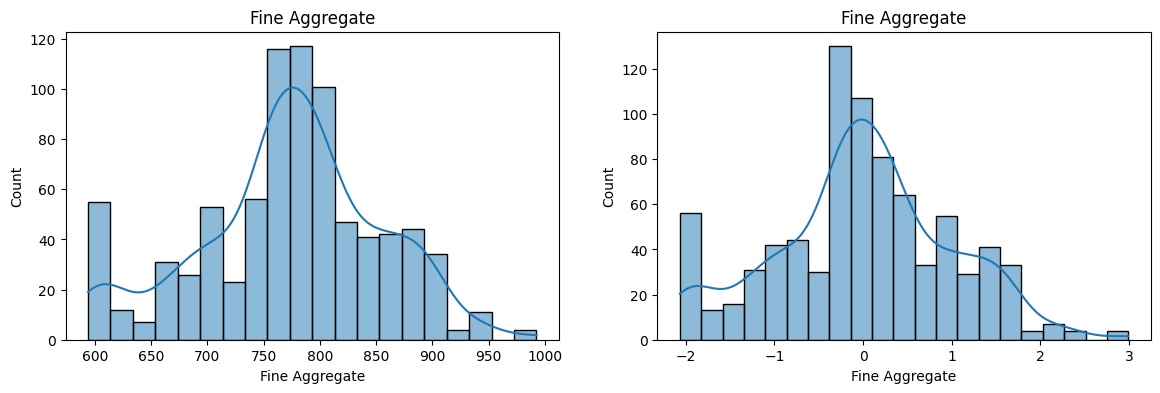

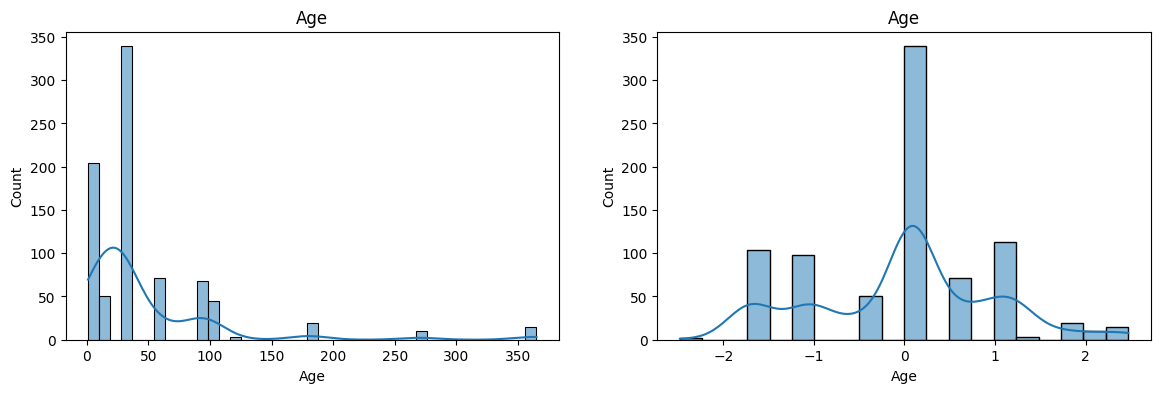

In [18]:
# Before and after comparision for Box-Cox Plot
x_train_trans = pd.DataFrame(x_train_trans,columns=x_train.columns)

for col in x_train_trans.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col],kde= True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_trans[col],kde=True)
    plt.title(col)

    plt.show()

# Yeo-Johnson Transformation

In [19]:
pt = PowerTransformer() # by default yeo-johnson
x_train_trans2 = pt.fit_transform(x_train)
x_test_trans2 = pt.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_trans2,y_train)
y_pred3 = lr.predict(x_test_trans2)
r2_score(y_test,y_pred3)

0.8253744908767401

In [20]:
pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson_Lambdas':pt.lambdas_})

,cols,Yeo_Johnson_Lambdas
0,Cement,0.150260
1,Blast Furnace Slag,0.038667
2,Fly Ash,-0.141876
3,Water,0.887369
4,Superplasticizer,0.293603
5,Coarse Aggregate,1.115901
6,Fine Aggregate,1.790678
7,Age,0.016397


In [21]:
pt = PowerTransformer()
x_trans2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_trans2,y,scoring= 'r2'))


np.float64(0.6834625141500864)

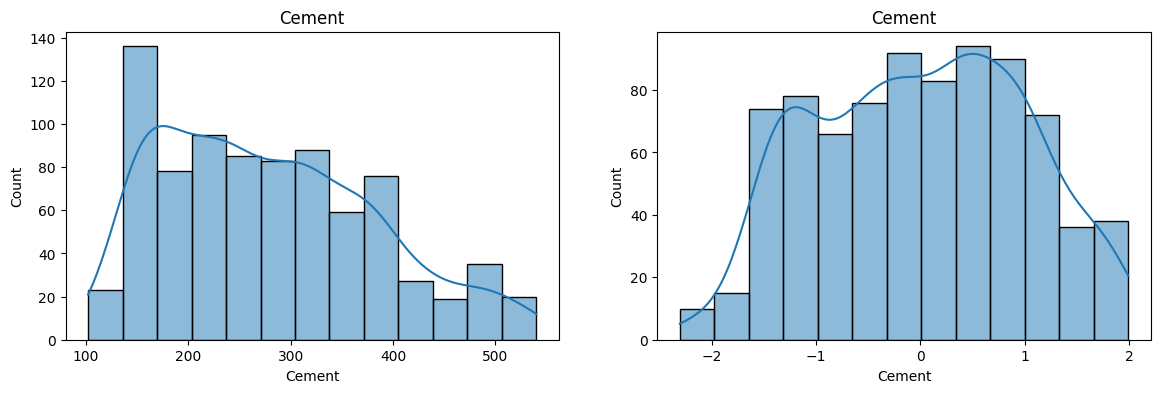

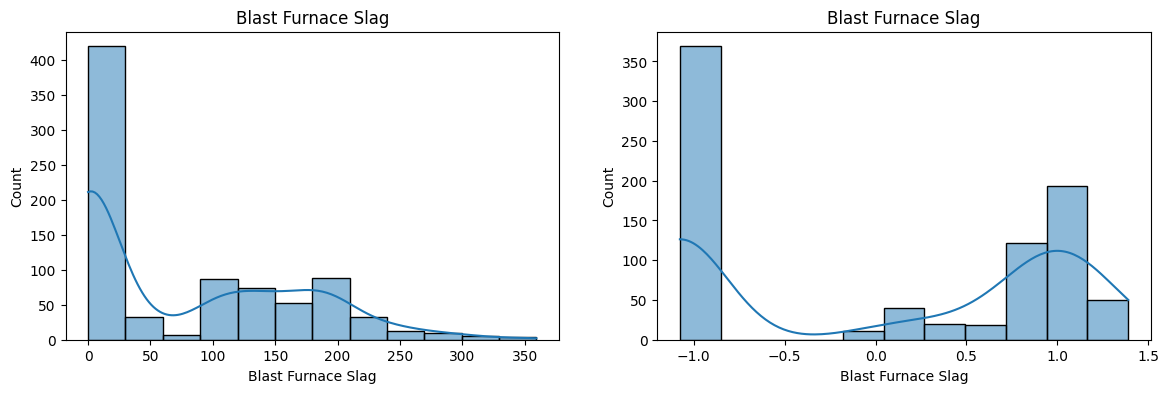

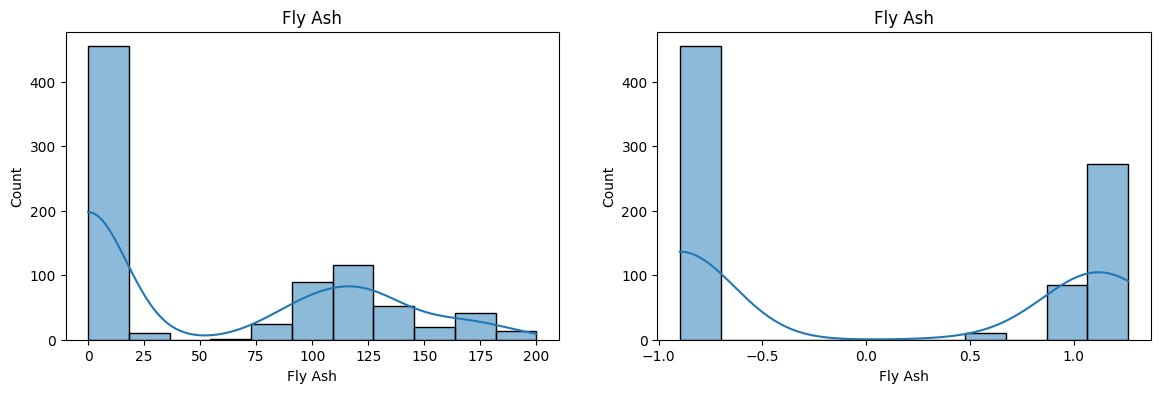

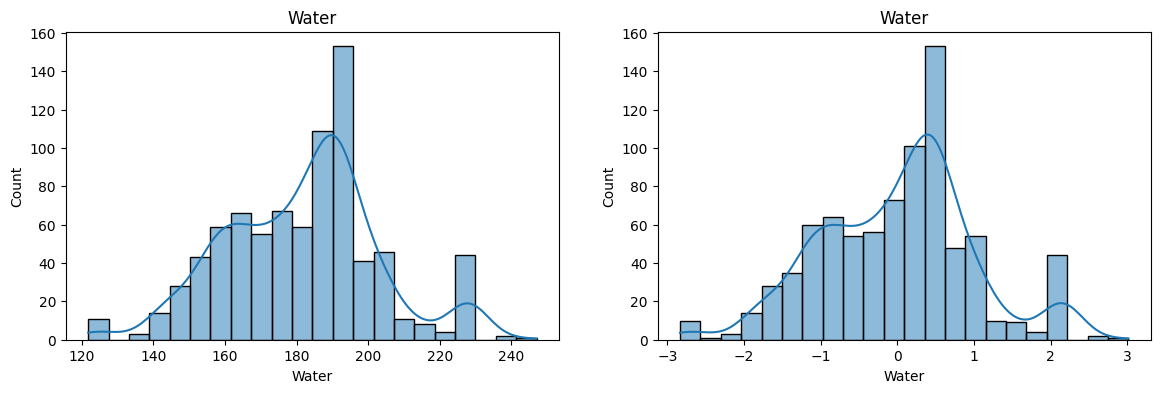

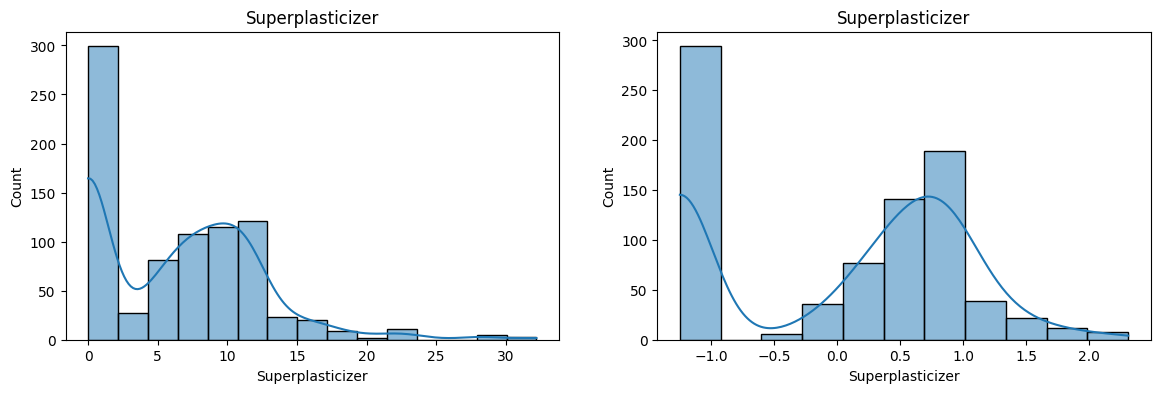

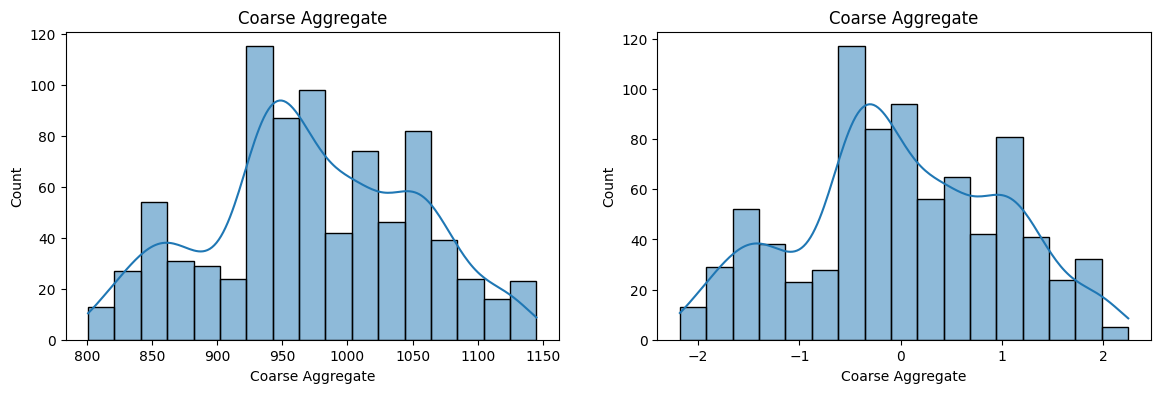

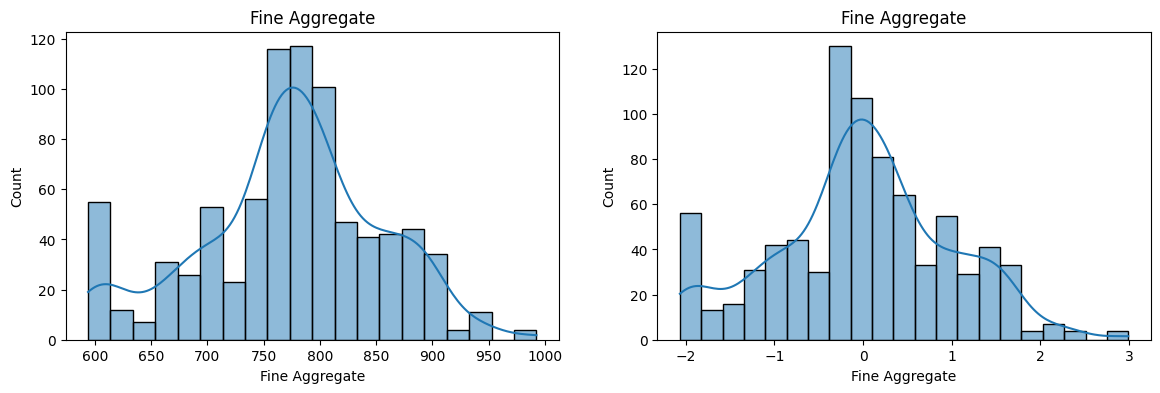

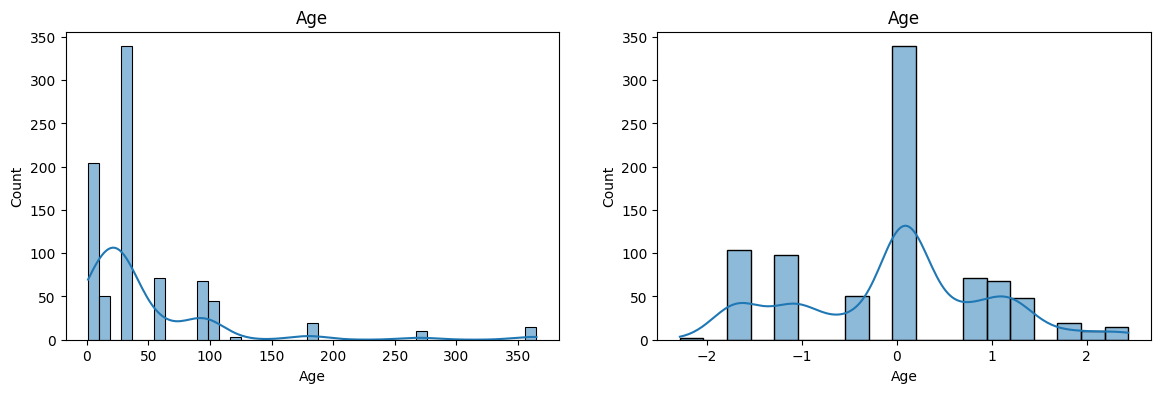

In [22]:
x_train_trans2 = pd.DataFrame(x_train_trans2,columns=x_train.columns)
# Before and after comparision for Yeo-Johnson

for col in x_train_trans2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col],kde = True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_trans2[col],kde= True)
    plt.title(col)

    plt.show()